In [1]:
import warnings
warnings.filterwarnings("ignore")

import math
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from IPython.display import display

print('TensorFlow version: ' + tf.__version__)

TensorFlow version: 2.7.0


In [2]:
iris = sns.load_dataset('iris')
display(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


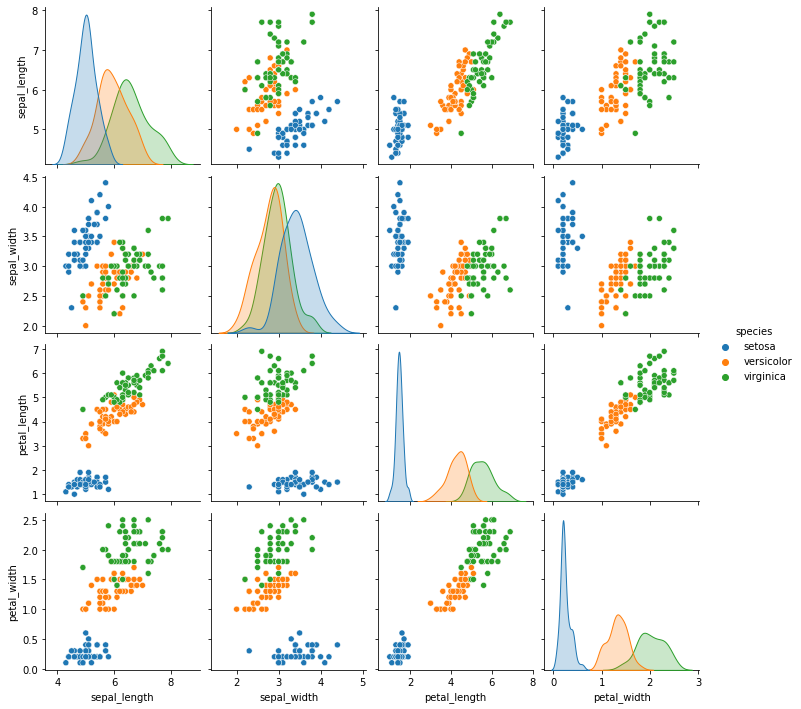

In [3]:
sns.pairplot(iris, hue ='species')

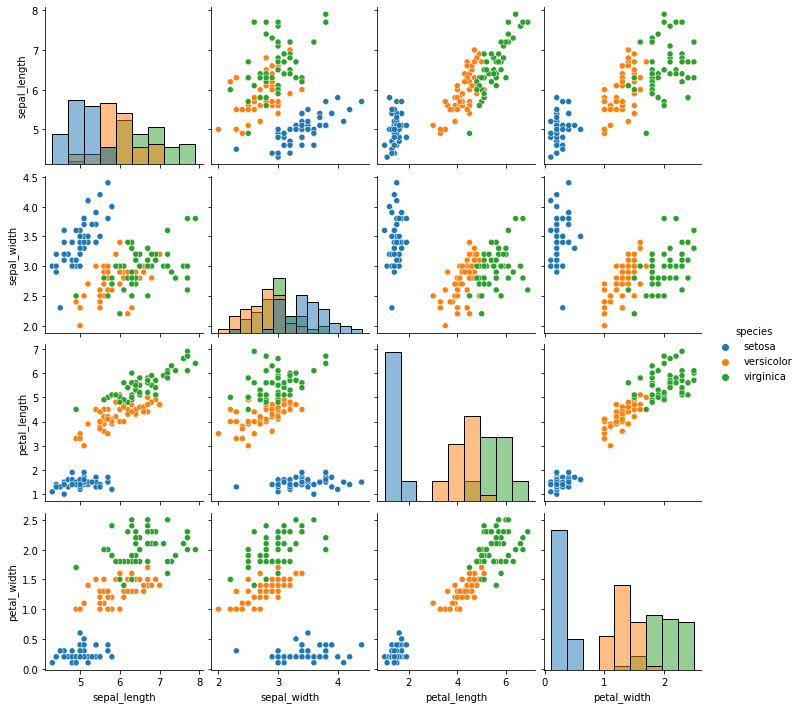

In [4]:
sns.pairplot(iris, hue ='species', diag_kind = 'hist')

In [5]:
species = iris['species'].unique()
species = pd.DataFrame(species)
n_class = species.shape[0]
print(n_class)
display(species)

3


,0
0,setosa
1,versicolor
2,virginica


In [6]:
dict_num_species = dict(zip(species.index, species.iloc[:, 0]))
print(dict_num_species)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


In [7]:
dict_species_num = dict(zip(species.iloc[:, 0], species.index))
print(dict_species_num)

{'setosa': 0, 'versicolor': 1, 'virginica': 2}


In [8]:
n = iris.shape[0]
iris['x1'] = np.random.randn(n,1)
iris['x2'] = np.random.randn(n,1)
iris['x3'] = np.random.rand(n,1)
iris['x4'] = np.random.rand(n,1)
display(iris)

,sepal_length,sepal_width,petal_length,petal_width,species,x1,x2,x3,x4
0,5.1,3.5,1.4,0.2,setosa,1.410111,0.563598,0.921768,0.059601
1,4.9,3.0,1.4,0.2,setosa,1.234581,0.355936,0.767159,0.068759
2,4.7,3.2,1.3,0.2,setosa,1.908421,-1.771924,0.608378,0.695302
3,4.6,3.1,1.5,0.2,setosa,-0.050402,1.398815,0.710497,0.752105
4,5.0,3.6,1.4,0.2,setosa,1.272939,-0.921758,0.568474,0.527697
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0.521514,-1.516464,0.147692,0.148666
146,6.3,2.5,5.0,1.9,virginica,-0.210332,1.027759,0.808091,0.227630
147,6.5,3.0,5.2,2.0,virginica,-0.646645,-1.543381,0.570744,0.368193
148,6.2,3.4,5.4,2.3,virginica,0.170478,-1.412547,0.371628,0.920684


In [9]:
types = pd.DataFrame(iris.dtypes)
types.columns = ['Data type']
display(types)

,Data type
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object
x1,float64
x2,float64
x3,float64
x4,float64


In [10]:
statistics = iris.describe().T
statistics['CV'] = statistics['std']/statistics['mean']
statistics = statistics.sort_values('CV', ascending=False)
display(statistics)

,count,mean,std,min,25%,50%,75%,max,CV
x1,150.0,0.044552,0.977517,-3.474866,-0.529052,0.135269,0.666068,2.419548,21.940851
petal_width,150.0,1.199333,0.762238,0.100000,0.300000,1.300000,1.800000,2.500000,0.635551
x4,150.0,0.493909,0.295889,0.003200,0.232221,0.493932,0.748457,0.999762,0.599077
x3,150.0,0.504672,0.293044,0.003364,0.254774,0.542535,0.745223,0.985980,0.580661
petal_length,150.0,3.758000,1.765298,1.000000,1.600000,4.350000,5.100000,6.900000,0.469744
sepal_width,150.0,3.057333,0.435866,2.000000,2.800000,3.000000,3.300000,4.400000,0.142564
sepal_length,150.0,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000,0.141711
x2,150.0,-0.126591,0.970558,-2.300963,-0.781584,-0.164755,0.515225,2.490860,-7.666861


In [11]:
target = 'species'
l_name = []
l_accuracy = []
for i in statistics.index.to_list():
    l_name.append(i)
    x = iris[[i]]
    y = iris[[target]]
    model = DecisionTreeClassifier(criterion='gini', max_depth=2) 
    model.fit(x, y) 
    expected = y 
    predicted = model.predict(x)
    l_accuracy.append(accuracy_score(expected, predicted))

d = {'Name': l_name, 'Accuracy score': l_accuracy}
imp = pd.DataFrame(d)
imp.set_index('Name', inplace=True)
imp = imp.sort_values('Accuracy score', ascending=False)
display(imp)

,Accuracy score
Name,
petal_width,0.960000
petal_length,0.953333
sepal_length,0.746667
sepal_width,0.593333
x1,0.466667
x4,0.413333
x3,0.400000
x2,0.373333


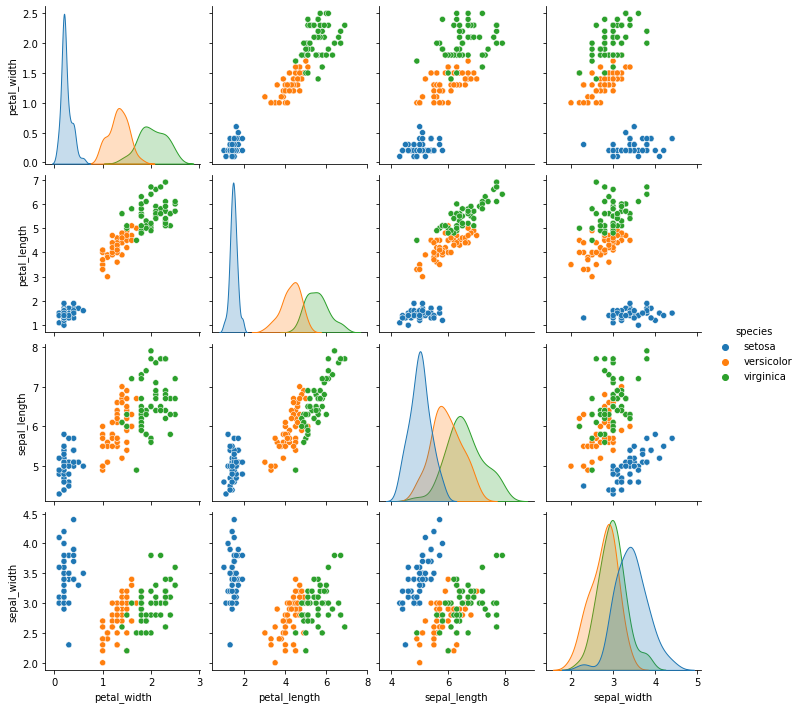

In [12]:
features = imp[imp['Accuracy score']> 0.5].index.tolist()
idx = features +[target]
charts = iris[idx]
sns.pairplot(charts, hue = target)

<AxesSubplot:>

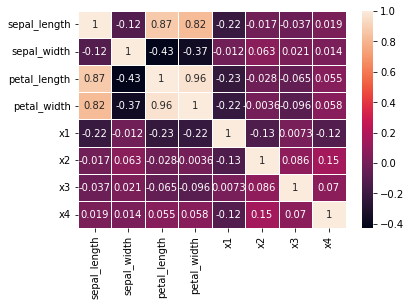

In [13]:
# calculate the correlation matrix
corr = iris.corr()
# plot the heatmap
sns.heatmap(corr, annot=True, linewidths=.5,
xticklabels=corr.columns,
yticklabels=corr.columns)

In [14]:
ctarget = target + '_code'
iris[ctarget] = iris[target].replace(dict_species_num)

In [15]:
iris_input = iris[features]
labels = iris[[ctarget]]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris_input, labels, test_size=0.5, random_state=42)
display(X_train)
display(y_train)

,petal_width,petal_length,sepal_length,sepal_width
84,1.5,4.5,5.4,3.0
148,2.3,5.4,6.2,3.4
53,1.3,4.0,5.5,2.3
5,0.4,1.7,5.4,3.9
93,1.0,3.3,5.0,2.3
...,...,...,...,...
71,1.3,4.0,6.1,2.8
106,1.7,4.5,4.9,2.5
14,0.2,1.2,5.8,4.0
92,1.2,4.0,5.8,2.6


,species_code
84,1
148,2
53,1
5,0
93,1
...,...
71,1
106,2
14,0
92,1


In [17]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
names = features
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
X_train_norm_pd = pd.DataFrame(X_train_norm)
X_test_norm_pd = pd.DataFrame(X_test_norm)
X_train_norm_pd.columns = names
X_test_norm_pd.columns = names
display(X_train_norm_pd)
display(X_test_norm_pd)

,petal_width,petal_length,sepal_length,sepal_width
0,0.192593,0.577778,0.693334,0.385186
1,0.250281,0.587616,0.674671,0.369981
2,0.178183,0.548254,0.753849,0.315246
3,0.058087,0.246870,0.784175,0.566349
4,0.153974,0.508113,0.769869,0.354140
...,...,...,...,...
70,0.164124,0.504996,0.770119,0.353497
71,0.232637,0.615803,0.670541,0.342113
72,0.027973,0.167836,0.811209,0.559454
73,0.157786,0.525952,0.762630,0.341869


,petal_width,petal_length,sepal_length,sepal_width
0,0.144905,0.567543,0.736599,0.338111
1,0.042465,0.240633,0.806828,0.537885
2,0.210885,0.632655,0.706006,0.238392
3,0.183377,0.550132,0.733509,0.354530
4,0.157433,0.539769,0.764673,0.314865
...,...,...,...,...
70,0.243001,0.607502,0.692552,0.303751
71,0.028315,0.198208,0.778674,0.594624
72,0.213201,0.568535,0.710669,0.355335
73,0.226207,0.607186,0.690525,0.321451


In [18]:
X_train_tensor = tf.convert_to_tensor(X_train_norm_pd, dtype = tf.float64)
X_test_tensor = tf.convert_to_tensor(X_test_norm_pd, dtype = tf.float64)
n_input = X_train_tensor.shape[1]
print('Best features number: '+str(n_input))

Best features number: 4


In [19]:
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=n_class, dtype="int32")
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=n_class, dtype="int32")
n_output = y_train_cat.shape[1]
print('Number of outputs: '+str(n_output))

Number of outputs: 3


In [20]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_dim=n_input))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(n_output, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 24)                120       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [22]:
total_rows = X_train_tensor.shape[0]
batch_size=int(total_rows/10)
print('Total rows:'+str(total_rows)+',  Batch size:'+str(batch_size))

Total rows:75,  Batch size:7


In [23]:
model.fit(X_train_tensor, y_train_cat, epochs=100, verbose=0, batch_size=batch_size, use_multiprocessing=True)

In [24]:
# evaluate the model
scores = model.evaluate(X_train_tensor, y_train_cat)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

3/3 [==============================] - 0s 1ms/step - loss: 0.1460 - accuracy: 0.9333
accuracy: 93.33%


In [25]:
# evaluate the model
scores = model.evaluate(X_test_tensor, y_test_cat)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

3/3 [==============================] - 0s 6ms/step - loss: 0.0973 - accuracy: 0.9733
accuracy: 97.33%


In [26]:
predictions = model.predict(X_test_tensor)

In [27]:
max_predictions = np.argmax(predictions, axis=1)

In [28]:
predictions_df = y_test.copy()
predictions_df['Prediction'] = max_predictions
predictions_df['Prediction'].replace(dict_num_species, inplace=True)
predictions_df['species_code'].replace(dict_num_species, inplace=True)

In [29]:
pd.crosstab(predictions_df['species_code'], predictions_df['Prediction'], dropna=False)

Prediction,setosa,versicolor,virginica
species_code,,,
setosa,29,0,0
versicolor,0,23,0
virginica,0,2,21
